In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\Airbnb Tokyo.csv")
data.head()

,Unnamed: 0,room_id,host_id,room_type,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
0,0,7565,20087,Entire home/apt,7.0,4.5,2.0,NaN,0.0,95,4.0,35.670170,139.741313
1,1,13389,52289,Private room,47.0,4.0,1.0,1.0,1.0,34,5.0,35.644269,139.693466
2,2,32482,140380,Private room,35.0,4.5,2.0,1.0,NaN,50,1.0,35.730653,139.689986
3,3,34647,149562,Entire home/apt,58.0,4.5,NaN,1.0,1.0,88,3.0,35.655350,139.693043
4,4,34651,149562,Entire home/apt,NaN,NaN,4.0,1.0,1.0,67,3.0,35.673975,139.729755


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6371 entries, 0 to 6370
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6371 non-null   int64  
 1   room_id               6371 non-null   int64  
 2   host_id               6371 non-null   int64  
 3   room_type             6371 non-null   object 
 4   reviews               4204 non-null   float64
 5   overall_satisfaction  5099 non-null   float64
 6   accommodates          5237 non-null   float64
 7   bedrooms              6361 non-null   float64
 8   bathrooms             6343 non-null   float64
 9   price                 6371 non-null   int64  
 10  minstay               5885 non-null   float64
 11  latitude              6371 non-null   float64
 12  longitude             6371 non-null   float64
dtypes: float64(8), int64(4), object(1)
memory usage: 647.2+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

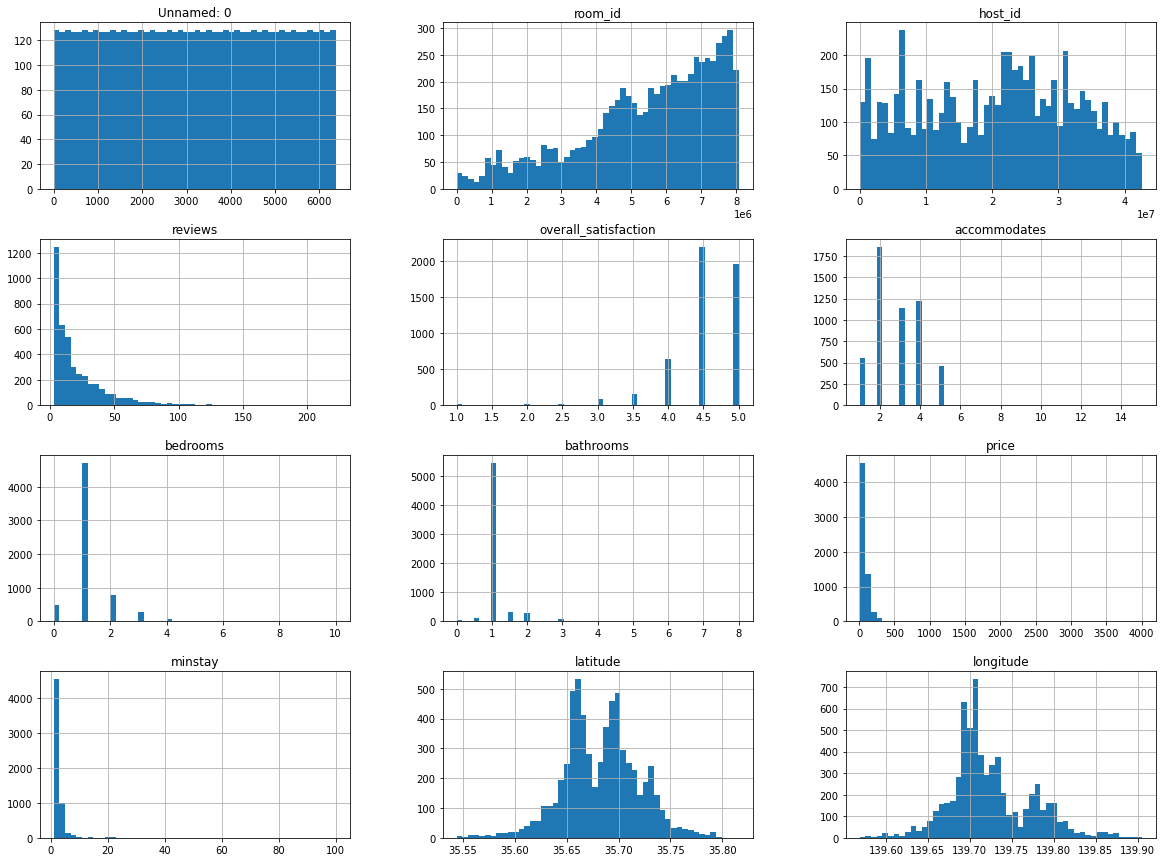

In [3]:
data.hist(bins=50, figsize=(20, 15))
plt.show

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

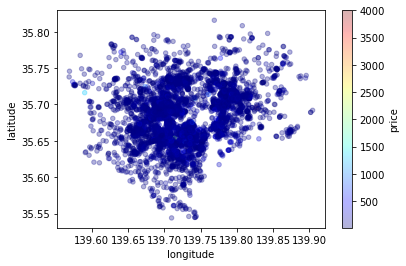

In [4]:
data.plot(kind = 'scatter', x = 'longitude', y ='latitude', alpha = 0.3,
                 c = 'price',cmap = plt.get_cmap('jet'),
                colorbar = True, sharex = False)

In [27]:
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

price                   1.000000
minstay                 0.442211
bedrooms                0.258913
accommodates            0.197817
overall_satisfaction    0.085543
reviews                 0.038552
longitude               0.030922
bathrooms               0.024227
room_id                -0.051236
Unnamed: 0             -0.052032
host_id                -0.055146
latitude               -0.081181
Name: price, dtype: float64

In [28]:
data["room_type"].value_counts()

Entire home/apt    4312
Private room       1619
Shared room         440
Name: room_type, dtype: int64

In [29]:
from sklearn.preprocessing import OneHotEncoder

apt = data[['room_type']]
encoder = OneHotEncoder()
apt = encoder.fit_transform(apt)
apt.toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [30]:
encoder.categories_

[array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]

In [31]:
apt = pd.DataFrame(columns=encoder.categories_[0],
                   data=apt.toarray())
apt.head(10)

,Entire home/apt,Private room,Shared room
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


In [32]:
# value = data[['price']]
# value.head()

In [33]:
data = data.fillna(0)
data.head()

,Unnamed: 0,room_id,host_id,room_type,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
0,0,7565,20087,Entire home/apt,7.0,4.5,2.0,0.0,0.0,95,4.0,35.670170,139.741313
1,1,13389,52289,Private room,47.0,4.0,1.0,1.0,1.0,34,5.0,35.644269,139.693466
2,2,32482,140380,Private room,35.0,4.5,2.0,1.0,0.0,50,1.0,35.730653,139.689986
3,3,34647,149562,Entire home/apt,58.0,4.5,0.0,1.0,1.0,88,3.0,35.655350,139.693043
4,4,34651,149562,Entire home/apt,0.0,0.0,4.0,1.0,1.0,67,3.0,35.673975,139.729755


In [34]:
data.drop(['host_id', 'room_id', 'Unnamed: 0', 'room_type'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6371 entries, 0 to 6370
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviews               6371 non-null   float64
 1   overall_satisfaction  6371 non-null   float64
 2   accommodates          6371 non-null   float64
 3   bedrooms              6371 non-null   float64
 4   bathrooms             6371 non-null   float64
 5   price                 6371 non-null   int64  
 6   minstay               6371 non-null   float64
 7   latitude              6371 non-null   float64
 8   longitude             6371 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 448.1 KB


In [35]:
data = pd.concat([data, apt], axis=1)
data.head()

,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
0,7.0,4.5,2.0,0.0,0.0,95,4.0,35.670170,139.741313,1.0,0.0,0.0
1,47.0,4.0,1.0,1.0,1.0,34,5.0,35.644269,139.693466,0.0,1.0,0.0
2,35.0,4.5,2.0,1.0,0.0,50,1.0,35.730653,139.689986,0.0,1.0,0.0
3,58.0,4.5,0.0,1.0,1.0,88,3.0,35.655350,139.693043,1.0,0.0,0.0
4,0.0,0.0,4.0,1.0,1.0,67,3.0,35.673975,139.729755,1.0,0.0,0.0


4000

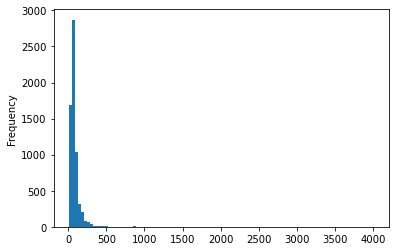

In [36]:
#Create Test Set
data['price'].plot(kind='hist', bins=100)
data['price'].max()

In [37]:
data['price'].mean()

86.6441688902841

In [38]:
data2 = data[(data['reviews'] == 0) | (data['overall_satisfaction'] == 0) | (data['accommodates'] == 0)].index
data3 = data.drop(data2)
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3459 entries, 0 to 6198
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviews               3459 non-null   float64
 1   overall_satisfaction  3459 non-null   float64
 2   accommodates          3459 non-null   float64
 3   bedrooms              3459 non-null   float64
 4   bathrooms             3459 non-null   float64
 5   price                 3459 non-null   int64  
 6   minstay               3459 non-null   float64
 7   latitude              3459 non-null   float64
 8   longitude             3459 non-null   float64
 9   Entire home/apt       3459 non-null   float64
 10  Private room          3459 non-null   float64
 11  Shared room           3459 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 351.3 KB


In [39]:
data3.head()

,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
0,7.0,4.5,2.0,0.0,0.0,95,4.0,35.670170,139.741313,1.0,0.0,0.0
1,47.0,4.0,1.0,1.0,1.0,34,5.0,35.644269,139.693466,0.0,1.0,0.0
2,35.0,4.5,2.0,1.0,0.0,50,1.0,35.730653,139.689986,0.0,1.0,0.0
5,3.0,3.5,5.0,2.0,1.0,302,5.0,35.658389,139.774400,1.0,0.0,0.0
7,10.0,5.0,4.0,1.0,1.0,95,2.0,35.731696,139.762696,1.0,0.0,0.0


In [40]:
value = data3[['price']]
value.head()

,price
0,95
1,34
2,50
5,302
7,95


In [41]:
data3.drop(['reviews', 'overall_satisfaction', 'price'], axis=1, inplace=True)
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3459 entries, 0 to 6198
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   accommodates     3459 non-null   float64
 1   bedrooms         3459 non-null   float64
 2   bathrooms        3459 non-null   float64
 3   minstay          3459 non-null   float64
 4   latitude         3459 non-null   float64
 5   longitude        3459 non-null   float64
 6   Entire home/apt  3459 non-null   float64
 7   Private room     3459 non-null   float64
 8   Shared room      3459 non-null   float64
dtypes: float64(9)
memory usage: 270.2 KB


In [42]:
data3 = pd.concat([data3, value], axis=1)
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3459 entries, 0 to 6198
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   accommodates     3459 non-null   float64
 1   bedrooms         3459 non-null   float64
 2   bathrooms        3459 non-null   float64
 3   minstay          3459 non-null   float64
 4   latitude         3459 non-null   float64
 5   longitude        3459 non-null   float64
 6   Entire home/apt  3459 non-null   float64
 7   Private room     3459 non-null   float64
 8   Shared room      3459 non-null   float64
 9   price            3459 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 297.3 KB


In [43]:
data3.head()

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room,price
0,2.0,0.0,0.0,4.0,35.670170,139.741313,1.0,0.0,0.0,95
1,1.0,1.0,1.0,5.0,35.644269,139.693466,0.0,1.0,0.0,34
2,2.0,1.0,0.0,1.0,35.730653,139.689986,0.0,1.0,0.0,50
5,5.0,2.0,1.0,5.0,35.658389,139.774400,1.0,0.0,0.0,302
7,4.0,1.0,1.0,2.0,35.731696,139.762696,1.0,0.0,0.0,95


2632

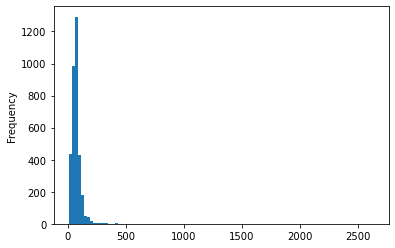

In [44]:
data3['price'].plot(kind='hist', bins=100)
data3['price'].max()

In [45]:
data3['price'].min()

10

In [46]:
data3['price'].mean()

75.28794449262793

In [47]:
from pandas import DataFrame

data_df = DataFrame(data3)
data_df

,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room,price
0,2.0,0.0,0.0,4.0,35.670170,139.741313,1.0,0.0,0.0,95
1,1.0,1.0,1.0,5.0,35.644269,139.693466,0.0,1.0,0.0,34
2,2.0,1.0,0.0,1.0,35.730653,139.689986,0.0,1.0,0.0,50
5,5.0,2.0,1.0,5.0,35.658389,139.774400,1.0,0.0,0.0,302
7,4.0,1.0,1.0,2.0,35.731696,139.762696,1.0,0.0,0.0,95
...,...,...,...,...,...,...,...,...,...,...
5979,5.0,2.0,1.0,1.0,35.712326,139.785087,1.0,0.0,0.0,52
5991,3.0,1.0,1.0,0.0,35.697329,139.694713,1.0,0.0,0.0,95
6004,2.0,1.0,1.0,1.0,35.706011,139.782799,1.0,0.0,0.0,59
6029,4.0,1.0,1.0,1.0,35.683989,139.741884,1.0,0.0,0.0,78


In [55]:
# data['group'] = pd.cut(x=data['price'],
# bins=[0, 50, 100, 150, 200, 4000],
# labels=['group_1','group_2','group_3','group_4','group_5'])
# data.head()

,overall_satisfaction,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room,price,group
0,4.5,2.0,NaN,0.0,4.0,35.670170,139.741313,1.0,0.0,0.0,95,group_2
1,4.0,1.0,1.0,1.0,5.0,35.644269,139.693466,0.0,1.0,0.0,34,group_1
2,4.5,2.0,1.0,NaN,1.0,35.730653,139.689986,0.0,1.0,0.0,50,group_1
3,4.5,NaN,1.0,1.0,3.0,35.655350,139.693043,1.0,0.0,0.0,88,group_2
4,NaN,4.0,1.0,1.0,3.0,35.673975,139.729755,1.0,0.0,0.0,67,group_2


In [48]:
# data_df.to_csv('C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingTokyo.csv')

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["group"]):
    train = data.loc[train_index]
    test = data.loc[test_index]

In [16]:
train['group'].value_counts() / len(train)

group_2    0.490973
group_1    0.280416
group_3    0.137559
group_4    0.048077
group_5    0.042975
Name: group, dtype: float64

In [17]:
test['group'].value_counts() / len(test)

group_2    0.490980
group_1    0.280784
group_3    0.137255
group_4    0.047843
group_5    0.043137
Name: group, dtype: float64

In [18]:
train.drop('group', axis=1, inplace=True)
train.head()

,overall_satisfaction,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room,price
2499,5.0,NaN,2.0,1.0,5.0,35.721767,139.761960,1.0,0.0,0.0,155
13,5.0,3.0,1.0,1.0,3.0,35.648340,139.719106,1.0,0.0,0.0,95
5323,NaN,2.0,0.0,1.0,1.0,35.661484,139.724204,1.0,0.0,0.0,164
298,5.0,3.0,1.0,1.0,2.0,35.659965,139.699710,1.0,0.0,0.0,120
1962,4.5,2.0,0.0,1.0,3.0,35.673760,139.772247,1.0,0.0,0.0,93


In [19]:
test.drop('group', axis=1, inplace=True)
test.head()

,overall_satisfaction,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room,price
3254,4.5,2.0,1.0,1.0,1.0,35.730182,139.767174,0.0,1.0,0.0,47
6337,NaN,2.0,1.0,1.0,1.0,35.694574,139.811956,1.0,0.0,0.0,67
6216,NaN,4.0,1.0,1.0,1.0,35.711197,139.799156,0.0,1.0,0.0,35
5701,NaN,NaN,2.0,1.0,1.0,35.715687,139.796120,1.0,0.0,0.0,129
5232,5.0,2.0,0.0,1.0,2.0,35.660003,139.691382,1.0,0.0,0.0,75


In [20]:
train_y = train[['price']]
train_y.head()

,price
2499,155
13,95
5323,164
298,120
1962,93


In [21]:
train.drop('price', axis=1, inplace=True)
train_X = train
train_X.head()

,overall_satisfaction,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
2499,5.0,NaN,2.0,1.0,5.0,35.721767,139.761960,1.0,0.0,0.0
13,5.0,3.0,1.0,1.0,3.0,35.648340,139.719106,1.0,0.0,0.0
5323,NaN,2.0,0.0,1.0,1.0,35.661484,139.724204,1.0,0.0,0.0
298,5.0,3.0,1.0,1.0,2.0,35.659965,139.699710,1.0,0.0,0.0
1962,4.5,2.0,0.0,1.0,3.0,35.673760,139.772247,1.0,0.0,0.0


In [22]:
test_y= test[['price']]
test_y.head()

,price
3254,47
6337,67
6216,35
5701,129
5232,75


In [23]:
test.drop('price', axis=1, inplace=True)
test_X = test
test_X.head()

,overall_satisfaction,accommodates,bedrooms,bathrooms,minstay,latitude,longitude,Entire home/apt,Private room,Shared room
3254,4.5,2.0,1.0,1.0,1.0,35.730182,139.767174,0.0,1.0,0.0
6337,NaN,2.0,1.0,1.0,1.0,35.694574,139.811956,1.0,0.0,0.0
6216,NaN,4.0,1.0,1.0,1.0,35.711197,139.799156,0.0,1.0,0.0
5701,NaN,NaN,2.0,1.0,1.0,35.715687,139.796120,1.0,0.0,0.0
5232,5.0,2.0,0.0,1.0,2.0,35.660003,139.691382,1.0,0.0,0.0


In [24]:
median = train_X['overall_satisfaction'].median()
train_X['overall_satisfaction'].fillna(median, inplace=True)
median = train_X['accommodates'].median()
train_X['accommodates'].fillna(median, inplace=True)
median = train_X['minstay'].median()
train_X['minstay'].fillna(median, inplace=True)
median = train_X['bedrooms'].median()
train_X['bedrooms'].fillna(median, inplace=True)
median = train_X['bathrooms'].median()
train_X['bathrooms'].fillna(median, inplace=True)

train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5096 entries, 2499 to 5810
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   overall_satisfaction  5096 non-null   float64
 1   accommodates          5096 non-null   float64
 2   bedrooms              5096 non-null   float64
 3   bathrooms             5096 non-null   float64
 4   minstay               5096 non-null   float64
 5   latitude              5096 non-null   float64
 6   longitude             5096 non-null   float64
 7   Entire home/apt       5096 non-null   float64
 8   Private room          5096 non-null   float64
 9   Shared room           5096 non-null   float64
dtypes: float64(10)
memory usage: 437.9 KB


In [25]:
test_X['overall_satisfaction'].fillna(median, inplace=True)
test_X['accommodates'].fillna(median, inplace=True)
test_X['minstay'].fillna(median, inplace=True)
test_X['bedrooms'].fillna(median, inplace=True)
test_X['bathrooms'].fillna(median, inplace=True)

test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 3254 to 264
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   overall_satisfaction  1275 non-null   float64
 1   accommodates          1275 non-null   float64
 2   bedrooms              1275 non-null   float64
 3   bathrooms             1275 non-null   float64
 4   minstay               1275 non-null   float64
 5   latitude              1275 non-null   float64
 6   longitude             1275 non-null   float64
 7   Entire home/apt       1275 non-null   float64
 8   Private room          1275 non-null   float64
 9   Shared room           1275 non-null   float64
dtypes: float64(10)
memory usage: 109.6 KB


In [26]:
#Select a model
from sklearn.linear_model import LinearRegression

l_reg = LinearRegression()
l_reg.fit(train_X, train_y)

LinearRegression()

In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np

predictions = l_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
rmse = np.sqrt(mse)
rmse

88.5695783040476

In [28]:
from sklearn.tree import DecisionTreeRegressor

d_reg = DecisionTreeRegressor()
d_reg.fit(train_X, train_y)

DecisionTreeRegressor()

In [29]:
predictions = d_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
rmse = np.sqrt(mse)
rmse

0.0

In [30]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_8768/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

In [31]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
rmse = np.sqrt(mse)
rmse

25.271028259444428

In [32]:
predictions = r_reg.predict(test_X)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
rmse

86.02453417712971

In [33]:
from sklearn.model_selection import GridSearchCV

param = {'n_estimators' : [1800], 'max_features' : [6, 8, 10], 'max_depth' : [10]}

r_reg = RandomForestRegressor(random_state=42)

search = GridSearchCV(r_reg, param, cv=5,
                      scoring='neg_mean_squared_error')
search.fit(train_X, train_y['price'].ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10], 'max_features': [6, 8, 10],
                         'n_estimators': [1800]},
             scoring='neg_mean_squared_error')

In [34]:
search.best_params_

{'max_depth': 10, 'max_features': 10, 'n_estimators': 1800}

In [35]:
r_reg = RandomForestRegressor(max_depth=100,
                              max_features=10,
                              max_leaf_nodes=None,
                              min_impurity_decrease=0.0,
                              min_impurity_split=None,
                              min_samples_leaf=1,
                              min_samples_split=2,
                              min_weight_fraction_leaf=0.0,
                              n_estimators=1800,
                              n_jobs=None,
                              random_state=42,
                              verbose=3)
r_reg.fit(train_X, train_y['price'].ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1800
building tree 2 of 1800
building tree 3 of 1800
building tree 4 of 1800
building tree 5 of 1800
building tree 6 of 1800
building tree 7 of 1800
building tree 8 of 1800
building tree 9 of 1800
building tree 10 of 1800
building tree 11 of 1800
building tree 12 of 1800
building tree 13 of 1800
building tree 14 of 1800
building tree 15 of 1800
building tree 16 of 1800
building tree 17 of 1800
building tree 18 of 1800
building tree 19 of 1800
building tree 20 of 1800
building tree 21 of 1800
building tree 22 of 1800
building tree 23 of 1800
building tree 24 of 1800
building tree 25 of 1800
building tree 26 of 1800
building tree 27 of 1800
building tree 28 of 1800
building tree 29 of 1800
building tree 30 of 1800
building tree 31 of 1800
building tree 32 of 1800
building tree 33 of 1800
building tree 34 of 1800
building tree 35 of 1800
building tree 36 of 1800
building tree 37 of 1800
building tree 38 of 1800
building tree 39 of 1800
building tree 40 of 1800
building 

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   30.9s finished


RandomForestRegressor(max_depth=100, max_features=10, n_estimators=1800,
                      random_state=42, verbose=3)

In [36]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
rmse = np.sqrt(mse)
rmse

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    2.0s finished


24.62891980416082

In [37]:
predictions = r_reg.predict(test_X)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
rmse

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    0.6s finished


86.0190088966283

In [40]:
# import pickle
# import joblib

# joblib.dump(r_reg, 'C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Model\\model.pkl')

['C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\model.pkl']